<a href="https://colab.research.google.com/github/AjinkyaSar/Data-Modeling/blob/main/ISF_and_SMOTE_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_csv('/content/Financial Institutions Fraud.csv', engine='python')
display(df.head())
display(df.shape) # Add shape display to confirm the number of rows

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


(1048575, 10)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [4]:
display(df.isnull().sum())

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [5]:
df.dtypes

,0
step,int64
type,object
amount,float64
nameOrig,object
oldbalanceOrg,float64
newbalanceOrig,float64
nameDest,object
oldbalanceDest,float64
newbalanceDest,float64
isFraud,int64


In [6]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


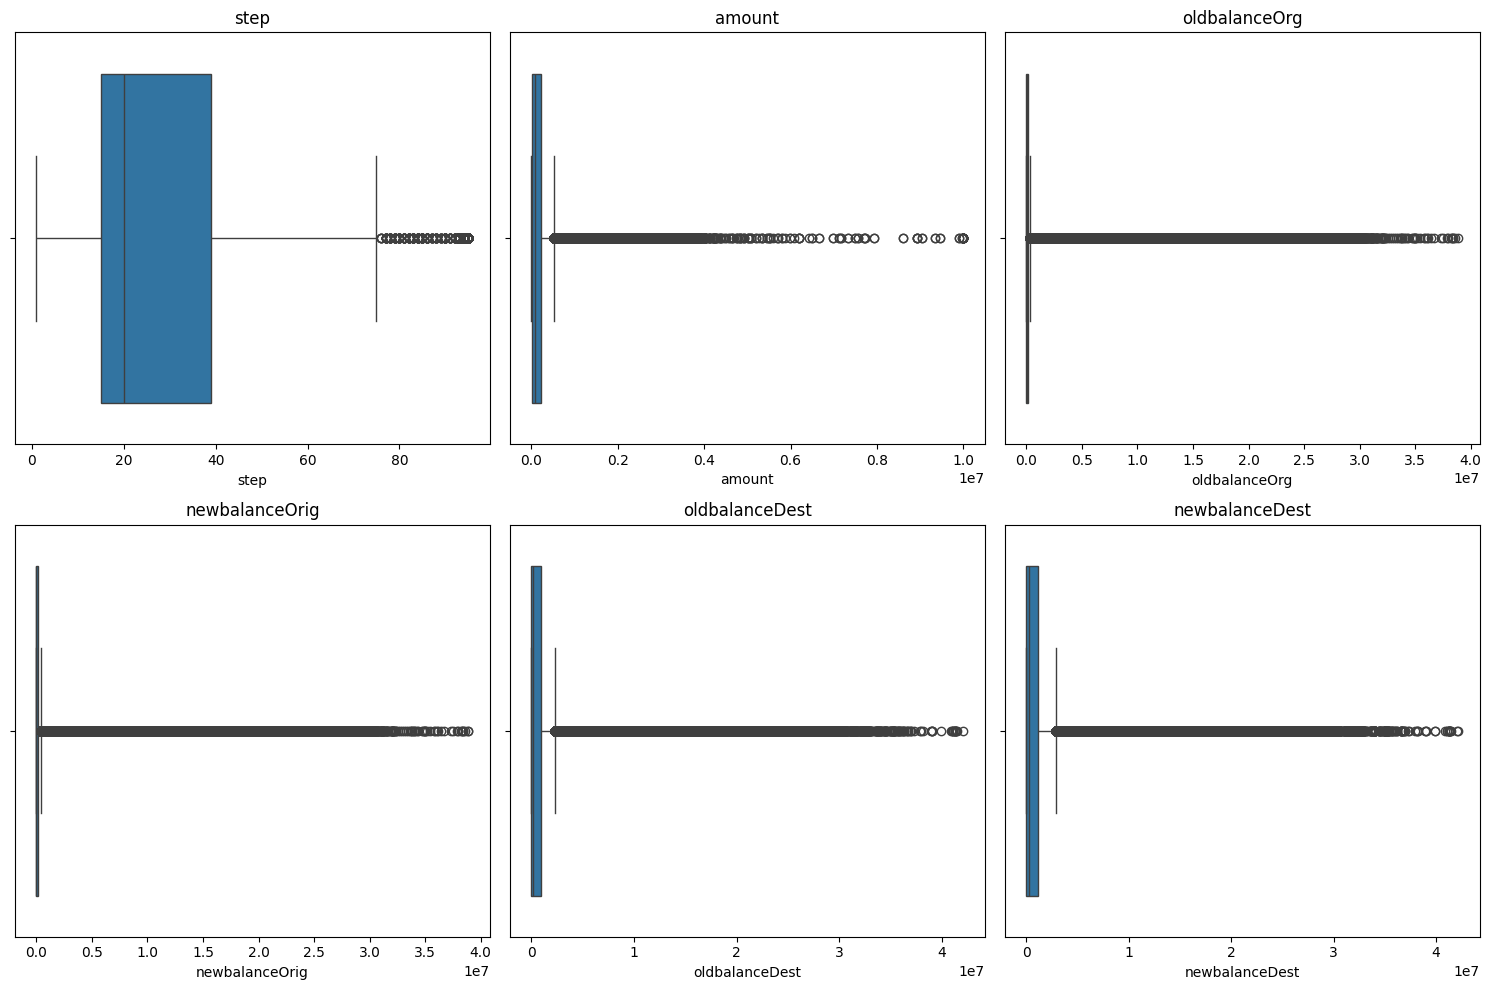

In [7]:
# Select numerical columns, excluding 'isFraud'
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
if 'isFraud' in numerical_cols:
    numerical_cols.remove('isFraud')

# Create boxplots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1) # Adjust subplot grid as needed
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [8]:
# Drop non-numeric and potentially irrelevant columns
df = df.drop(['nameDest', 'nameOrig'], axis=1)
display(df.head())

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [9]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'type' column
df['type'] = label_encoder.fit_transform(df['type'])

display(df.head())

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,1
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0


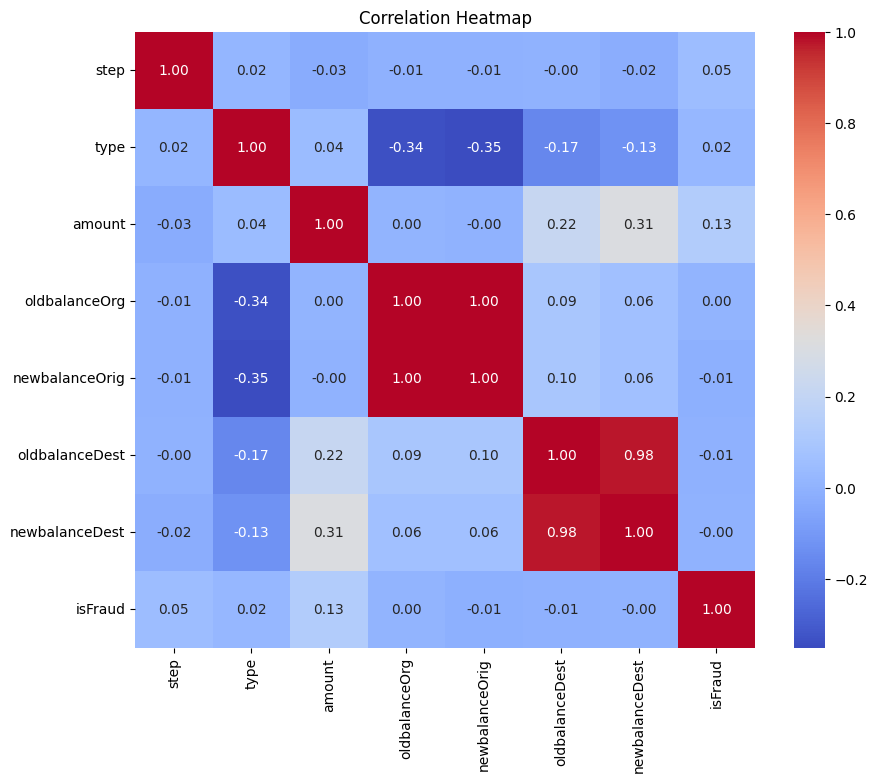

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

X = df.drop('isFraud', axis=1)
y = df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

display(X_scaled[:5]) # Display the first 5 rows of the scaled data

array([[-1.6620219 ,  0.9565757 , -0.56173807, -0.23685497, -0.24383202,
        -0.42588334, -0.46106169],
       [-1.6620219 ,  0.9565757 , -0.59184049, -0.28695576, -0.29067345,
        -0.42588334, -0.46106169],
       [-1.6620219 ,  1.70006662, -0.59819391, -0.29404519, -0.29711726,
        -0.42588334, -0.46106169],
       [-1.6620219 , -0.53040613, -0.59819391, -0.29404519, -0.29711726,
        -0.41666087, -0.46106169],
       [-1.6620219 ,  0.9565757 , -0.55483653, -0.28012309, -0.28718269,
        -0.42588334, -0.46106169]])

In [13]:
import statsmodels.api as sm

# Combine X_train and y_train to easily drop rows with missing values
train_data = pd.concat([X_train, y_train], axis=1)

# Drop rows with any missing values
train_data_cleaned = train_data.dropna()

# Separate X_train and y_train again
X_train_cleaned = train_data_cleaned.drop('isFraud', axis=1)
y_train_cleaned = train_data_cleaned['isFraud']

# Add a constant to the cleaned features
X_train_sm = sm.add_constant(X_train_cleaned)
X_test_sm = sm.add_constant(X_test)

# Fit the OLS regression model using the cleaned training data
model = sm.OLS(y_train_cleaned, X_train_sm)
results = model.fit()

print(results.summary())

# Generate predictions on the test set
y_pred = results.predict(X_test_sm)

                            OLS Regression Results                            
Dep. Variable:                isFraud   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                 1.599e+04
Date:                Mon, 18 Aug 2025   Prob (F-statistic):               0.00
Time:                        11:49:18   Log-Likelihood:             1.7222e+06
No. Observations:              838860   AIC:                        -3.444e+06
Df Residuals:                  838852   BIC:                        -3.444e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0020   9.05e-05     22.

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Convert predicted probabilities to class labels using a threshold of 0.5
y_pred_class = (y_pred > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred_class))
print("Precision:", precision_score(y_test, y_pred_class))
print("Recall:", recall_score(y_test, y_pred_class))
print("F1-score:", f1_score(y_test, y_pred_class))
print("\nClassification Report:\n", classification_report(y_test, y_pred_class))

Accuracy: 0.9989938726366736
Precision: 1.0
Recall: 0.05803571428571429
F1-score: 0.10970464135021098

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    209491
           1       1.00      0.06      0.11       224

    accuracy                           1.00    209715
   macro avg       1.00      0.53      0.55    209715
weighted avg       1.00      1.00      1.00    209715



In [15]:
from sklearn.ensemble import IsolationForest

# Initialize and train the Isolation Forest model
# n_estimators is the number of trees in the forest
# contamination is the proportion of outliers in the data set. 'auto' lets the model decide.
model = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
model.fit(X) # Use the entire dataset X for training

# Predict anomalies (-1 for outliers, 1 for inliers)
# We use the original X data before splitting
y_pred_iso = model.predict(X)

# Add the anomaly scores and predictions to the original dataframe for analysis
df['anomaly_score'] = model.decision_function(X)
df['is_anomaly_iso'] = y_pred_iso

# Display the head of the dataframe with the new columns
display(df.head())

# Display the count of anomalies detected
print("Number of anomalies detected by Isolation Forest:", list(df['is_anomaly_iso']).count(-1))

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,anomaly_score,is_anomaly_iso
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0,0.077074,1
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0.095949,1
2,1,4,181.00,181.0,0.00,0.0,0.0,1,0.057413,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0.086369,1
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0,0.096169,1


Number of anomalies detected by Isolation Forest: 146842


In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# --- 1. Separate features (X) and target (y) ---
X = df_cleaned.drop(['isFraud', 'anomaly_score', 'is_anomaly_iso'], axis=1)
y = df_cleaned['isFraud']

print("Before SMOTE:")
print(y.value_counts())

# --- 2. Train-test split (important: apply SMOTE only on training set, not test set) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 3. Apply SMOTE on training set ---
smote = SMOTE(random_state=42, sampling_strategy="auto")
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("\nAfter SMOTE (train only):")
print(y_train_res.value_counts())


Before SMOTE:
isFraud
0    901171
1       562
Name: count, dtype: int64

After SMOTE (train only):
isFraud
0    720936
1    720936
Name: count, dtype: int64


In [18]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

# ----------------------------
# 1. Features & Target
# ----------------------------
X = df_cleaned.drop(['isFraud', 'anomaly_score', 'is_anomaly_iso'], axis=1)
y = df_cleaned['isFraud']

# ----------------------------
# 2. Train-Test Split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----------------------------
# 3. SMOTE on training set
# ----------------------------
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", y_train_res.value_counts().to_dict())

# ----------------------------
# 4. Add constant (Intercept)
# ----------------------------
X_train_res_const = sm.add_constant(X_train_res)
X_test_const = sm.add_constant(X_test)

# ----------------------------
# 5. Fit Logistic Regression
# ----------------------------
logit_model = sm.Logit(y_train_res, X_train_res_const)
result = logit_model.fit()

# ----------------------------
# 6. Model Summary
# ----------------------------
print(result.summary())

# ----------------------------
# 7. Predictions
# ----------------------------
y_pred_prob = result.predict(X_test_const)
y_pred = (y_pred_prob >= 0.5).astype(int)

# ----------------------------
# 8. Evaluation
# ----------------------------
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))


Before SMOTE: {0: 720936, 1: 450}
After SMOTE: {0: 720936, 1: 720936}


/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.284332
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                isFraud   No. Observations:              1441872
Model:                          Logit   Df Residuals:                  1441864
Method:                           MLE   Df Model:                            7
Date:                Mon, 18 Aug 2025   Pseudo R-squ.:                  0.5898
Time:                        11:49:34   Log-Likelihood:            -4.0997e+05
converged:                       True   LL-Null:                   -9.9943e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1783      0.008    -21.236      0.000      -0.195      -0.162
step            

/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


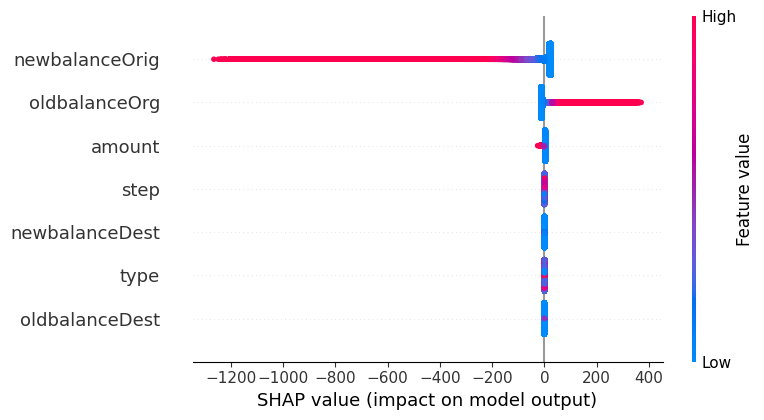

In [24]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --------------------------------
# 1. Extract Coefficients and Intercept
# --------------------------------
# Get the coefficients and intercept from the statsmodels result object.
# The 'const' coefficient is the intercept.
coef = result.params.drop('const').values
intercept = result.params['const']

# --------------------------------
# 2. SHAP Explainer
# --------------------------------
# Create the explainer using the extracted values.
# The masker is the resampled training data without the 'const' column.
explainer = shap.LinearExplainer(
    (coef, intercept),
    masker=X_train_res_const.drop('const', axis=1)
)

# --------------------------------
# 3. Calculate SHAP values
# --------------------------------
# Calculate SHAP values for the test set.
# The data passed here also should not include the 'const' column.
shap_values = explainer.shap_values(X_test_const.drop('const', axis=1))

# --------------------------------
# 4. Create a pandas DataFrame for plotting
# --------------------------------
# The plotting data should match the data used to calculate SHAP values.
X_test_df = X_test_const.drop('const', axis=1)

# --------------------------------
# 5. Plot the SHAP summary plot (Dot Plot)
# --------------------------------
# This is the default plot type and will produce the figure you want.
shap.summary_plot(
    shap_values,
    features=X_test_df
)

In [25]:
# Drop 'newbalanceOrig' and 'oldbalanceOrg' columns
df = df.drop(['newbalanceOrig', 'oldbalanceOrg'], axis=1)

# Display the head of the dataframe to confirm the columns are dropped
display(df.head())

,step,type,amount,oldbalanceDest,newbalanceDest,isFraud,anomaly_score,is_anomaly_iso
0,1,3,9839.64,0.0,0.0,0,0.077074,1
1,1,3,1864.28,0.0,0.0,0,0.095949,1
2,1,4,181.00,0.0,0.0,1,0.057413,1
3,1,1,181.00,21182.0,0.0,1,0.086369,1
4,1,3,11668.14,0.0,0.0,0,0.096169,1


In [26]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

# ----------------------------
# 1. Features & Target
# ----------------------------
X = df.drop(['isFraud', 'anomaly_score', 'is_anomaly_iso'], axis=1)
y = df['isFraud']

# ----------------------------
# 2. Train-Test Split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----------------------------
# 3. SMOTE on training set
# ----------------------------
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", y_train_res.value_counts().to_dict())

# ----------------------------
# 4. Add constant (Intercept)
# ----------------------------
X_train_res_const = sm.add_constant(X_train_res)
X_test_const = sm.add_constant(X_test)

# ----------------------------
# 5. Fit Logistic Regression
# ----------------------------
logit_model = sm.Logit(y_train_res, X_train_res_const)
result = logit_model.fit()

# ----------------------------
# 6. Model Summary
# ----------------------------
print(result.summary())

# ----------------------------
# 7. Predictions
# ----------------------------
y_pred_prob = result.predict(X_test_const)
y_pred = (y_pred_prob >= 0.5).astype(int)

# ----------------------------
# 8. Evaluation
# ----------------------------
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))


Before SMOTE: {0: 837946, 1: 914}
After SMOTE: {0: 837946, 1: 837946}
Optimization terminated successfully.
         Current function value: 0.450401
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                isFraud   No. Observations:              1675892
Model:                          Logit   Df Residuals:                  1675886
Method:                           MLE   Df Model:                            5
Date:                Mon, 18 Aug 2025   Pseudo R-squ.:                  0.3502
Time:                        12:04:05   Log-Likelihood:            -7.5482e+05
converged:                       True   LL-Null:                   -1.1616e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -3.0796     

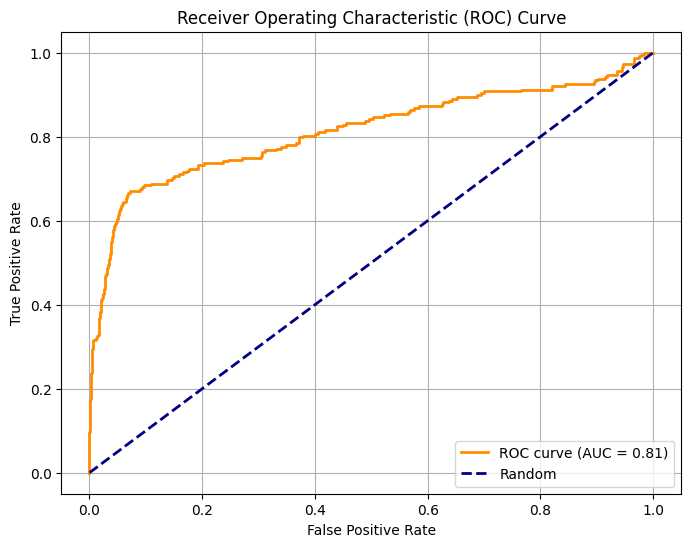

AUC Score: 0.81


In [27]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_prob are available from the previous logistic regression model evaluation

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"AUC Score: {roc_auc:.2f}")